# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<BarContainer object of 12 artists>

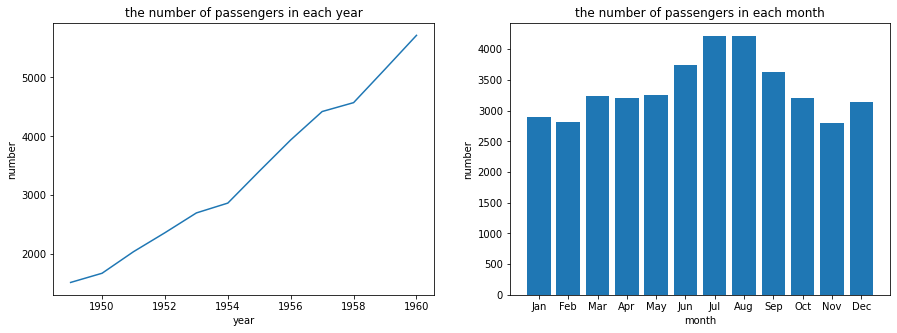

In [3]:

sales_by_year = data.groupby("year")["passengers"].sum()
all_sales_y = sales_by_year.to_dict()
x = all_sales_y.keys()
y = all_sales_y.values()

sales_by_month = data.groupby("month")["passengers"].sum()
all_sales_m = sales_by_month.to_dict()
x_m = all_sales_m.keys()
y_m = all_sales_m.values()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylabel("number")
plt.title("the number of passengers in each year")
plt.xlabel("year")
plt.plot(x,y)


plt.subplot(1,2,2)
plt.ylabel("number")
plt.xlabel("month")
plt.title("the number of passengers in each month")

plt.bar(x_m,y_m)

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print(data.columns,len(data.columns))

grouped = data.groupby('species')
#print(grouped.get_group("setosa"))

sp_type = list(data["species"])
print(sp_type)
import pandas as pd

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 5
['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

150


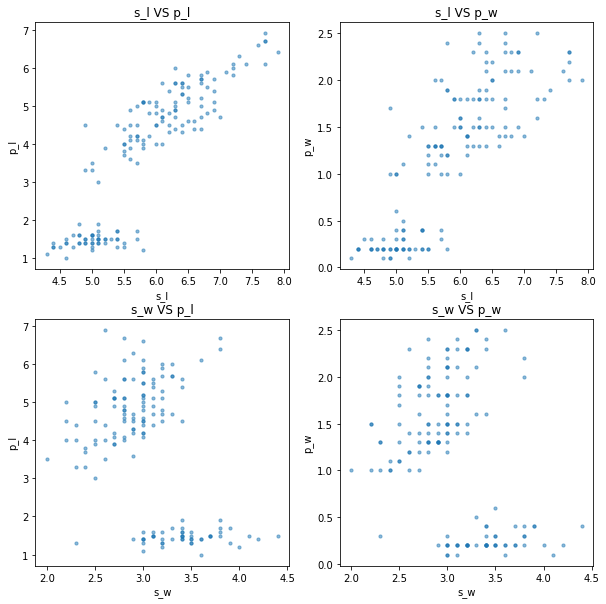

In [6]:
print(len(data["sepal_length"]))
s_l=data["sepal_length"]
s_w=data["sepal_width"]
p_l=data["petal_length"]
p_w=data["petal_width"]
iris_head = [[s_l,s_w],[p_l,p_w]]
iris_str = [['s_l','s_w'],['p_l','p_w']]
plt.figure(figsize=(10,10))
n=1
for i in range(2):
    for j in range(2):
        
        plt.subplot(2,2,n)
        plt.scatter(iris_head[0][i],iris_head[1][j],alpha=0.5,
            s=10)
        plt.title(iris_str[0][i]+" VS "+iris_str[1][j])
        plt.xlabel(iris_str[0][i])
        plt.ylabel(iris_str[1][j])
        n+=1




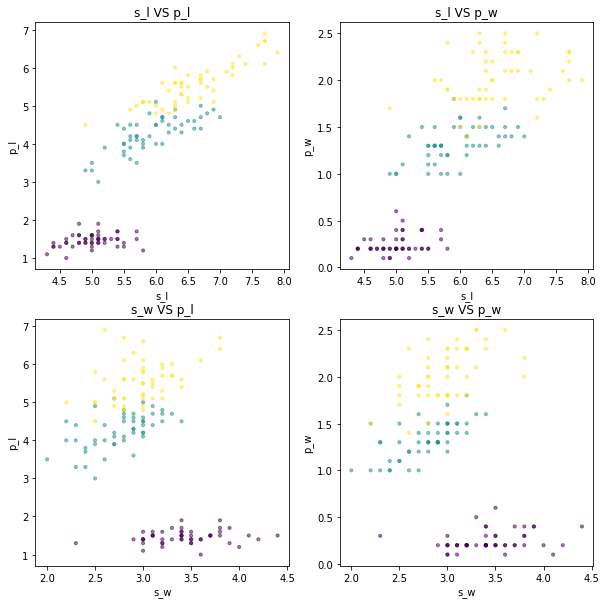

In [7]:
color = []
for i in sp_type:
    if i == 'setosa':
        color.append(0)
    elif i == 'versicolor':
        color.append(1)
    elif i == 'virginica':
        color.append(2)


plt.figure(figsize=(10,10))
n=1
for i in range(2):
    for j in range(2):
        
        plt.subplot(2,2,n)
        plt.scatter(iris_head[0][i],iris_head[1][j],alpha=0.5,
            s=10,c=color)
        plt.title(iris_str[0][i]+" VS "+iris_str[1][j])
        plt.xlabel(iris_str[0][i])
        plt.ylabel(iris_str[1][j])
        n+=1

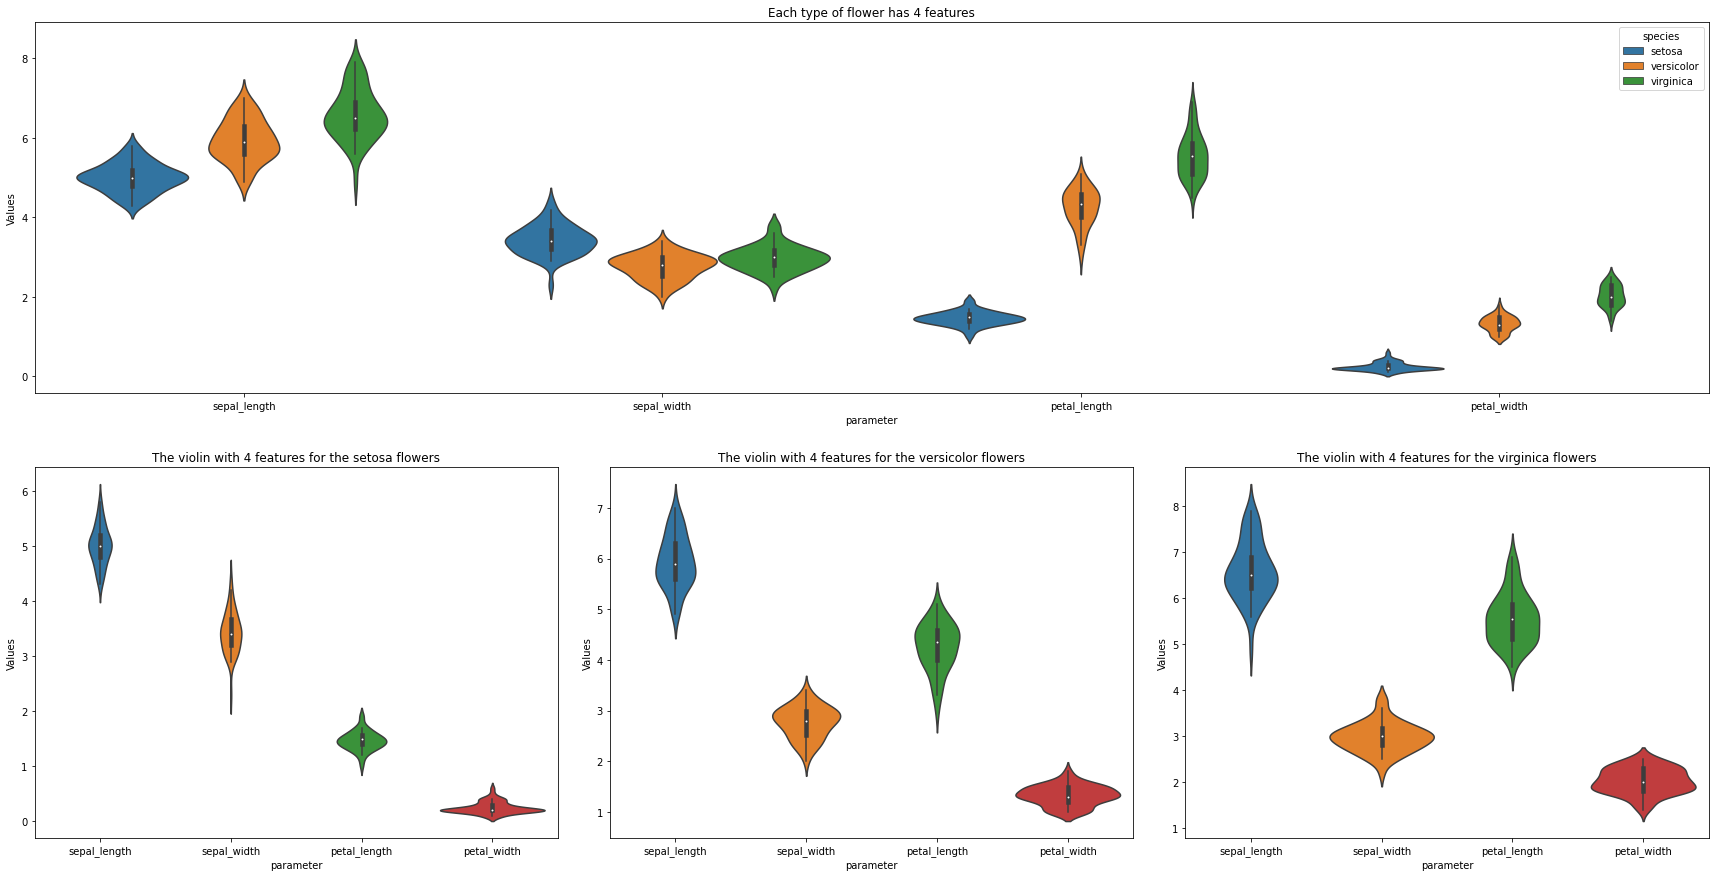

In [7]:
SP_arr =list(data.columns[:4]) #获得data表格前4个表头，也就是花的特征参数名

#对data列表数据进行合并，id_vars表示不合并的列，value_vars表示需要合并的列，var_name设置存放"列名"的新列，value_name设置存放合并数据的新列
SP_value = pd.melt(data, id_vars=['species'],value_vars=SP_arr,var_name="parameter",value_name="Values")
SP_value.head

#对合并后的列表分组，根据类别的不同横向分割
grouped = SP_value.groupby('species')
setosa_G=grouped.get_group("setosa") #类型为setosa的花
versicolor_G=grouped.get_group("versicolor")#类型为versicolor的花
virginica_G=grouped.get_group("virginica")#类型为virginica的花
species_name = ["setosa","versicolor","virginica"]#保存类别名称
species_list = [setosa_G,versicolor_G,virginica_G] #设置用于检索的列表
plt.figure(figsize=(30,15))#设置画布
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.2)#设置排版网格，h/wspace代表高/宽间距
plt.subplot(grid[0,0:])
#绘制带有hue分类的提琴图
sns.violinplot(data=SP_value,x = "parameter", y = "Values",hue="species")
plt.title("Each type of flower has 4 features")
#绘制各个类别的提琴图
for i in range(3):
    plt.subplot(grid[1,i])
    sns.violinplot(data=species_list[i],x = "parameter", y = "Values")
    plt.title("The violin with 4 features for the "+ species_name[i]+" flowers")


## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [34]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'total bill')

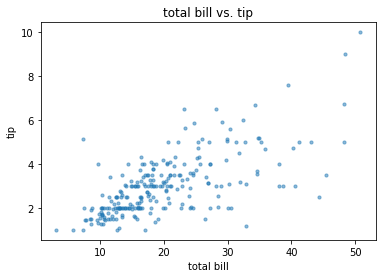

In [9]:
plt.scatter(data["total_bill"],data["tip"],alpha=0.5,
            s=10)
plt.title("total bill vs. tip")
plt.ylabel("tip")
plt.xlabel("total bill")

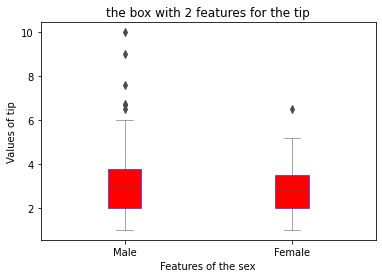

In [17]:
def boxplotfunc(data,x,y,color,boxprops,linewidth,width,title,xlabel,ylabel):
    sns.boxplot(data=data,x = x, y = y,
                color=color,
                boxprops=boxprops,
                linewidth=linewidth,
                width=width,
                )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

linewidth=0.5
width=0.2
boxplotfunc(data=data,x = "sex", y = "tip",
                color="blue",
                boxprops={"edgecolor": "blue","facecolor": "red"},
                linewidth=linewidth,
                width=width,title="the box with 2 features for the tip",xlabel="Features of the sex",ylabel="Values of tip")

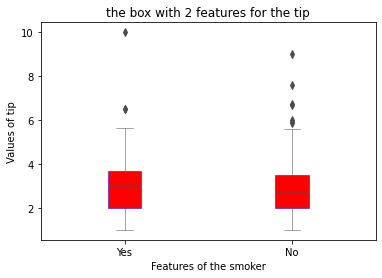

In [18]:
boxplotfunc(data=data,x = "smoker", y = "tip",
               color="blue",
               boxprops={"edgecolor": "blue","facecolor": "red"},
               linewidth=linewidth,
                width=width,
                title="the box with 2 features for the tip",
                xlabel="Features of the smoker",ylabel="Values of tip")

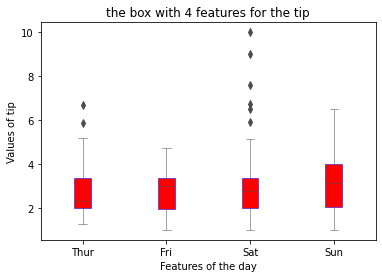

In [19]:
boxplotfunc(data=data,x = "day", y = "tip",
               color="blue",
               boxprops={"edgecolor": "blue","facecolor": "red"},
               linewidth=linewidth,
                width=width,
                title="the box with 4 features for the tip",
                xlabel="Features of the day",ylabel="Values of tip")

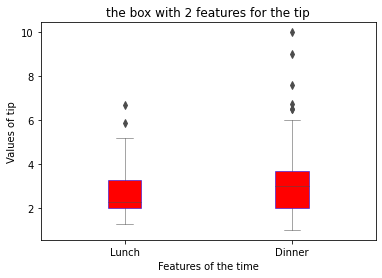

In [21]:
boxplotfunc(data=data,x = "time", y = "tip",
               color="blue",
               boxprops={"edgecolor": "blue","facecolor": "red"},
               linewidth=linewidth,
                width=width,
                title="the box with 2 features for the tip",
                xlabel="Features of the time",ylabel="Values of tip")

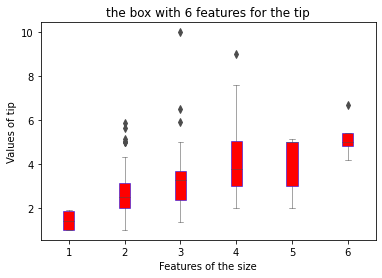

In [23]:
boxplotfunc(data=data,x = "size", y = "tip",
               color="blue",
               boxprops={"edgecolor": "blue","facecolor": "red"},
               linewidth=linewidth,
                width=width,
                title="the box with 6 features for the tip",
                xlabel="Features of the size",ylabel="Values of tip")

       total_bill                  tip                size          
smoker        Yes         No       Yes        No       Yes        No
sex                                                                 
Male    22.284500  19.791237  3.051167  3.113402  2.500000  2.711340
Female  17.977879  18.105185  2.931515  2.773519  2.242424  2.592593
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


Text(0.5, 1.0, 'Values by Sex (Male or Female) and Smoker (yes or no)')

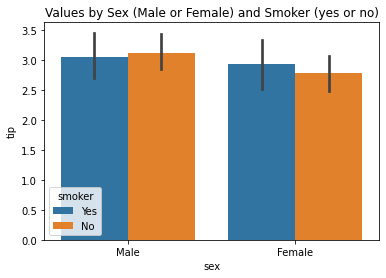

In [52]:
grouped = data.groupby(["sex", "smoker"]).mean()
unstacked = grouped.unstack()
print(unstacked)
result = unstacked.loc[:, "tip"]
print(result)
sns.barplot(x="sex", y="tip", hue="smoker", data=data) 
plt.title("Values by Sex (Male or Female) and Smoker (yes or no)")

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [39]:
titanic = sns.load_dataset("titanic")
titanic.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unsurvived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136          80    216       0.629630         0.370370
2             87          97    184       0.472826         0.527174
3            119         372    491       0.242363         0.757637


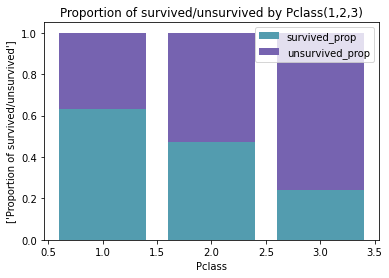

In [50]:
import numpy as np
def data_sur_unsur(grouped):
# 计算每个pclass中存活（survived）和未存活（unsurvived）的乘客数量
    survived_count = titanic.groupby(grouped)['survived'].sum()
    unsurvived_count = titanic.groupby(grouped)['survived'].apply(lambda x: x.size - x.sum())

    # 计算总乘客数
    total_count = titanic.groupby(grouped)['survived'].count()

    # 计算存活和未存活的比例
    survived_prop = survived_count / total_count
    unsurvived_prop = unsurvived_count / total_count

    # 创建统计表
    stats_df = pd.DataFrame({
        'survived': survived_count,
        'unsurvived': unsurvived_count,
        'total': total_count,
        'survived_prop': survived_prop,
        'unsurvived_prop': unsurvived_prop
    })
    return stats_df
stats_df = data_sur_unsur(grouped='pclass')
prop = ['survived_prop','unsurvived_prop']
print(stats_df)
width = 0.8
colors = ['#539caf', '#7663b0']
def barfunc(x,y,width,label,colors,title,xlabel,ylabel):
    for i in range(0, len(prop)):
        if i == 0:
            plt.bar(x,y[i],width=width,align = 'center', label = label[i],color =colors[i])
        else:
            plt.bar(x,y[i],width=width,bottom=y[0],align = 'center', label = label[i],color =colors[i])
    plt.legend(loc = 'upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

barfunc(x=stats_df.index.values,y=[stats_df['survived_prop'],stats_df["unsurvived_prop"]],width=width,label=prop,colors=colors,title="Proportion of survived/unsurvived by Pclass(1,2,3)",xlabel="Pclass",ylabel=["Proportion of survived/unsurvived"])



        survived  unsurvived  total  survived_prop  unsurvived_prop
sex                                                                
female       233          81    314       0.742038         0.257962
male         109         468    577       0.188908         0.811092


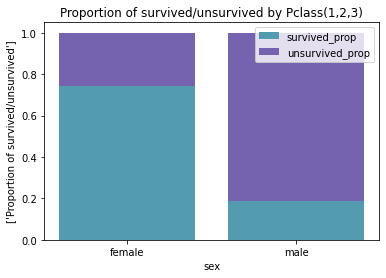

In [26]:
groupeds='sex'
stats_df2= data_sur_unsur(grouped=groupeds)
print(stats_df2)
barfunc(x=stats_df2.index.values,y=[stats_df2['survived_prop'],stats_df2["unsurvived_prop"]],width=width,label=prop,colors=colors,title="Proportion of survived/unsurvived by Pclass(1,2,3)",xlabel=groupeds,ylabel=["Proportion of survived/unsurvived"])

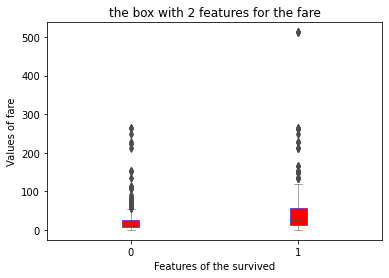

In [32]:
width_t = 0.1
xfeatures_name = 'survived'
yfeatures_name = 'fare'
boxplotfunc(
    data=titanic,x=xfeatures_name,y=yfeatures_name,
    color='blue',
    boxprops={"edgecolor": "blue","facecolor": "red"},
    linewidth=linewidth,
    width=width_t,
    title=("the box with 2 features for the "+yfeatures_name),
    xlabel=("Features of the "+xfeatures_name),ylabel=("Values of "+yfeatures_name))

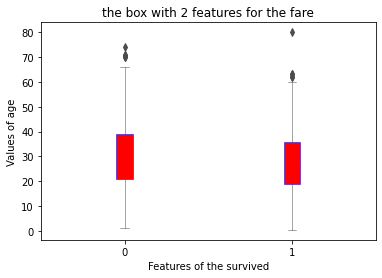

In [33]:

xfeatures_name = 'survived'
yfeatures_name = 'age'
boxplotfunc(
    data=titanic,x=xfeatures_name,y=yfeatures_name,
    color='blue',
    boxprops={"edgecolor": "blue","facecolor": "red"},
    linewidth=linewidth,
    width=width_t,
    title=("the box with 2 features for the "+yfeatures_name),
    xlabel=("Features of the "+xfeatures_name),ylabel=("Values of "+yfeatures_name))

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353
[-1.  0.  1.]


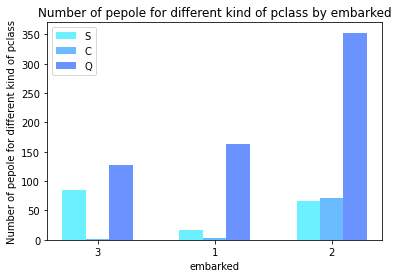

In [119]:
'''unsurvived_count = titanic.groupby(["embarked","pclass"])['survived'].apply(lambda x: x.size - x.sum())
unresult = unsurvived_count .unstack()
unresult_values = unresult.values

grouped = titanic.groupby(["embarked","pclass"]).sum()
unstacked = grouped.unstack()
result = unstacked.loc[:,'survived']

result_values = result.values
#print(unresult)
#print(result)
all_values = result_values+unresult_values
#print(all_values)'''

x_n = 'embarked'
y_n = 'pclass'

width = 0.2
colors = ['#6bf0ff','#6bbcff','#6b93ff']
def bar_labfunc(x_n,y_n,width,colors, ylabel,title,xlabels=None,labelsname=None):
    embarked_pclass =  pd.crosstab(titanic[x_n], titanic[y_n])
    print(embarked_pclass)
    if xlabels is None:
        xlabels = titanic[y_n].unique()
    if labelsname  is None:
        labelsname = titanic[x_n].unique()
    all_values = embarked_pclass.values

    x = np.arange(len(xlabels))

    width_set_arr = np.arange((1-(len(x)+1)/2),(len(x)+1)/2,1)
    print(width_set_arr)
    for i in range(len(x)):

        plt.bar(x + (width*width_set_arr[i]),all_values[i],width,label=labelsname[i],color=colors[i])
    plt.xticks(x, labels=xlabels)
    plt.title(title)
    plt.xlabel(x_n)
    plt.ylabel(ylabel)
    plt.legend()

bar_labfunc(x_n,y_n,width,colors,ylabel=('Number of pepole for different kind of '+y_n),
            title=('Number of pepole for different kind of '+y_n +' by '+x_n))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64


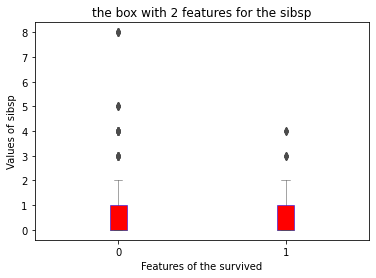

In [90]:
xfeatures_name = 'survived'
yfeatures_name = 'sibsp'
sibsp_counts = titanic[yfeatures_name].value_counts()
print(sibsp_counts)
boxplotfunc(
    data=titanic,x=xfeatures_name,y=yfeatures_name,
    color='blue',
    boxprops={"edgecolor": "blue","facecolor": "red"},
    linewidth=linewidth,
    width=width_t,
    title=("the box with 2 features for the "+yfeatures_name),
    xlabel=("Features of the "+xfeatures_name),ylabel=("Values of "+yfeatures_name))

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


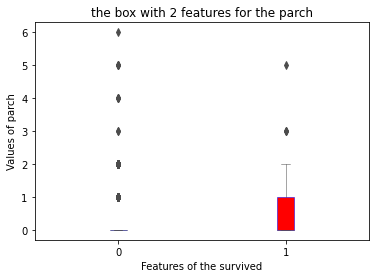

In [91]:
xfeatures_name = 'survived'
yfeatures_name = 'parch'
sibsp_counts = titanic[yfeatures_name].value_counts()
print(sibsp_counts)
boxplotfunc(
    data=titanic,x=xfeatures_name,y=yfeatures_name,
    color='blue',
    boxprops={"edgecolor": "blue","facecolor": "red"},
    linewidth=linewidth,
    width=width_t,
    title=("the box with 2 features for the "+yfeatures_name),
    xlabel=("Features of the "+xfeatures_name),ylabel=("Values of "+yfeatures_name))

survived    0    1
alone             
False     175  179
True      374  163
[-0.5  0.5]


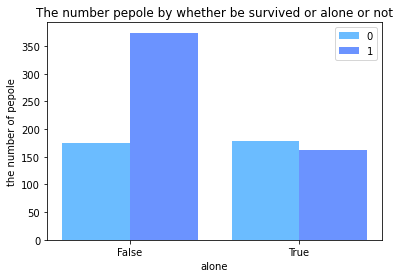

In [120]:

x_n = 'alone'
y_n = 'survived'

width = 0.4
colors = ['#6bbcff','#6b93ff']
bar_labfunc(x_n,y_n,width,colors,ylabel=('the number of pepole'),
            title=('The number pepole by whether be survived or alone or not'),
            xlabels=titanic[x_n].unique(),labelsname=titanic[y_n].unique()
            )
